In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [2]:
rawData = pd.read_csv("C:\\Users\\hp\\Downloads\\Datasets\\cars.csv")
rawData.tail(3)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000
99,100,Tata,Altroz,2020,18000,Petrol,Manual,First,20,1199,85,5,600000


In [3]:
rawData.isnull().sum()

Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [4]:
rawData['Year'].value_counts()

Year
2018    28
2019    28
2017    21
2020    17
2016     4
2021     2
Name: count, dtype: int64

In [5]:
data = rawData.copy()

In [6]:
data['Brand'] = data['Brand'].map({'Toyota' : 1,'Honda' : 2, 'Ford' : 3, 'Maruti' : 4, 'Hyundai' : 5, 'Tata' : 6, 'Mahindra' : 7,
       'Volkswagen' : 8, 'Audi' : 9, 'BMW' : 10, 'Mercedes': 11})
data['Fuel_Type']=data['Fuel_Type'].map({'Petrol' : 0, 'Diesel' : 1})
data['Owner_Type']=data['Owner_Type'].map({'First' : 1, 'Second' : 2, 'Third' : 3})
data['Transmission']= data['Transmission'].map({'Manual':0, 'Automatic' : 1})
data_with_sklearn = data.copy()
data_with_sklearn.head(3)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,1,Corolla,2018,50000,0,0,1,15,1498,108,5,800000
1,2,2,Civic,2019,40000,0,1,2,17,1597,140,5,1000000
2,3,3,Mustang,2017,20000,0,1,1,10,4951,395,4,2500000


In [7]:
data_with_sklearn.to_csv('car_price_sklearn', index=False)

In [8]:
data_with_sklearn.columns

Index(['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

C:\Users\hp\AppData\Local\Temp\ipykernel_15888\1808289348.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_sklearn['Price'])


<Axes: xlabel='Price', ylabel='Density'>

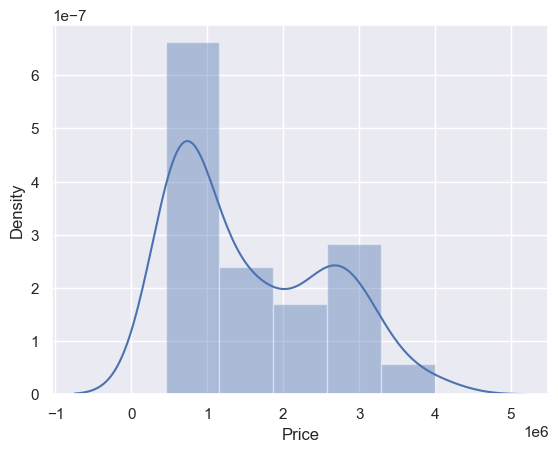

In [9]:
sns.distplot(data_with_sklearn['Price'])

In [10]:
data_with_sklearn.columns.values

array(['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine',
       'Power', 'Seats', 'Price'], dtype=object)

C:\Users\hp\AppData\Local\Temp\ipykernel_15888\944406574.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_sklearn['Car_ID'])


<Axes: xlabel='Car_ID', ylabel='Density'>

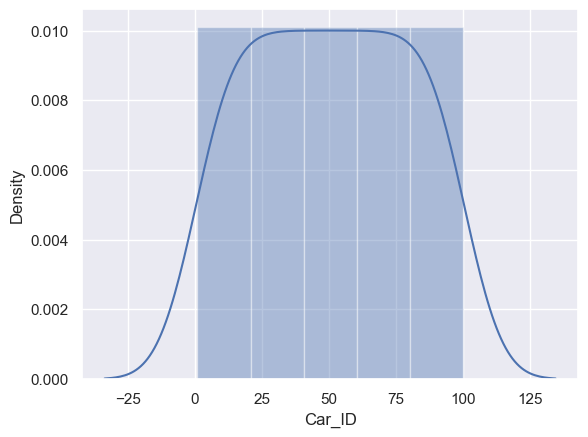

In [11]:
sns.distplot(data_with_sklearn['Car_ID'])

C:\Users\hp\AppData\Local\Temp\ipykernel_15888\3199695569.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_sklearn['Brand'])


<Axes: xlabel='Brand', ylabel='Density'>

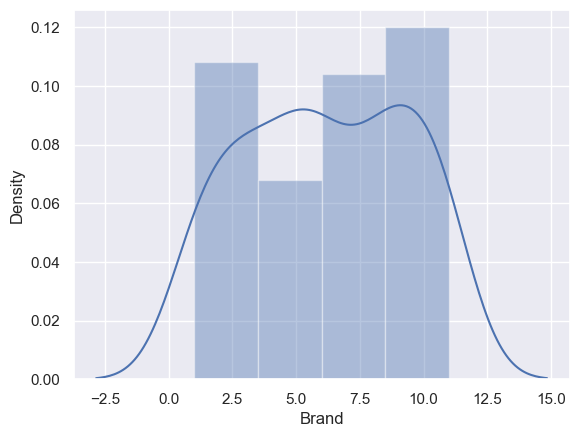

In [12]:
sns.distplot(data_with_sklearn['Brand'])

C:\Users\hp\AppData\Local\Temp\ipykernel_15888\1207826966.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_sklearn['Year'])


<Axes: xlabel='Year', ylabel='Density'>

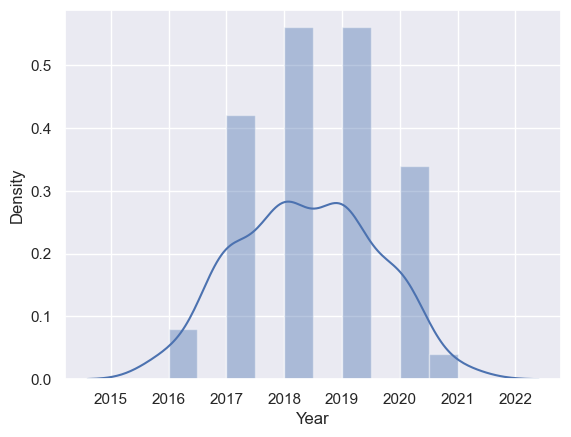

In [13]:
sns.distplot(data_with_sklearn['Year'])

C:\Users\hp\AppData\Local\Temp\ipykernel_15888\601065464.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_sklearn['Kilometers_Driven'])


<Axes: xlabel='Kilometers_Driven', ylabel='Density'>

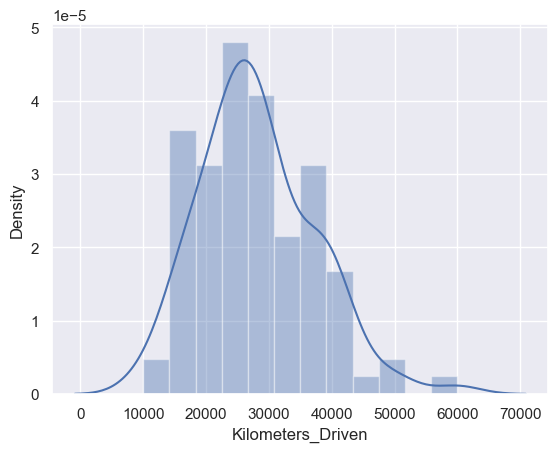

In [14]:
sns.distplot(data_with_sklearn['Kilometers_Driven'])

C:\Users\hp\AppData\Local\Temp\ipykernel_15888\1834059110.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_sklearn['Fuel_Type'])


<Axes: xlabel='Fuel_Type', ylabel='Density'>

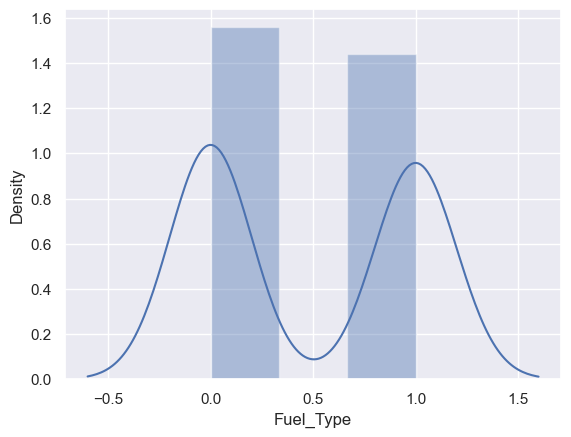

In [15]:
sns.distplot(data_with_sklearn['Fuel_Type'])

C:\Users\hp\AppData\Local\Temp\ipykernel_15888\1841312998.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_sklearn['Transmission'])


<Axes: xlabel='Transmission', ylabel='Density'>

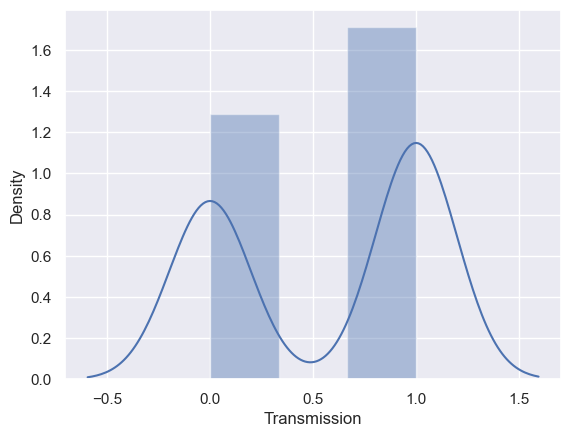

In [16]:
sns.distplot(data_with_sklearn['Transmission'])

C:\Users\hp\AppData\Local\Temp\ipykernel_15888\2517807927.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_sklearn['Owner_Type'])


<Axes: xlabel='Owner_Type', ylabel='Density'>

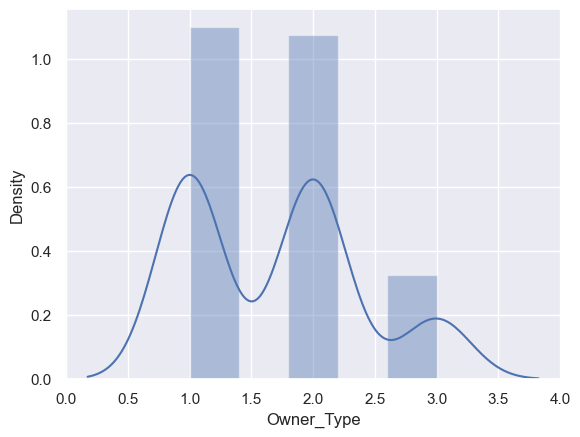

In [17]:
sns.distplot(data_with_sklearn['Owner_Type'])

C:\Users\hp\AppData\Local\Temp\ipykernel_15888\3277845389.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_sklearn['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

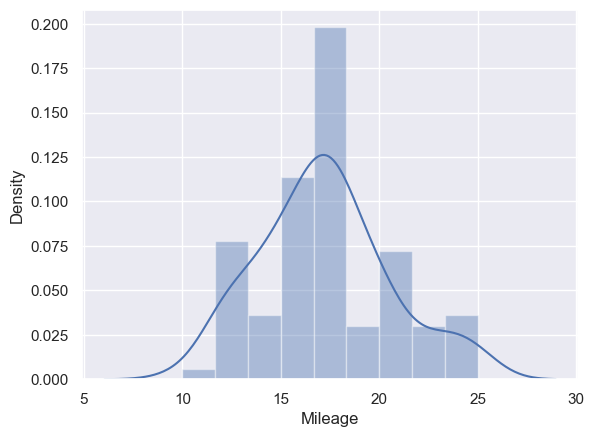

In [18]:
sns.distplot(data_with_sklearn['Mileage'])

C:\Users\hp\AppData\Local\Temp\ipykernel_15888\1844365827.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_sklearn['Engine'])


<Axes: xlabel='Engine', ylabel='Density'>

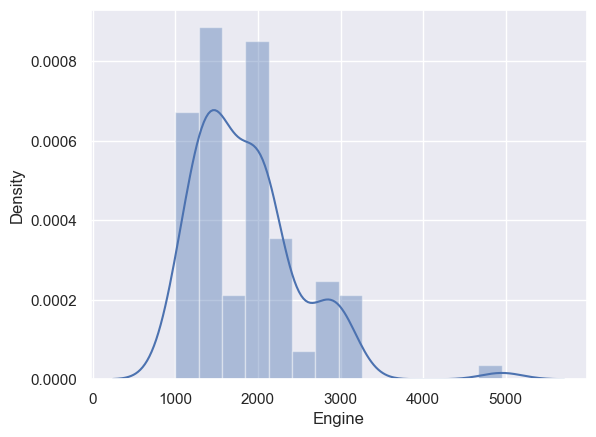

In [19]:
sns.distplot(data_with_sklearn['Engine'])

C:\Users\hp\AppData\Local\Temp\ipykernel_15888\4105908197.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_sklearn['Power'])


<Axes: xlabel='Power', ylabel='Density'>

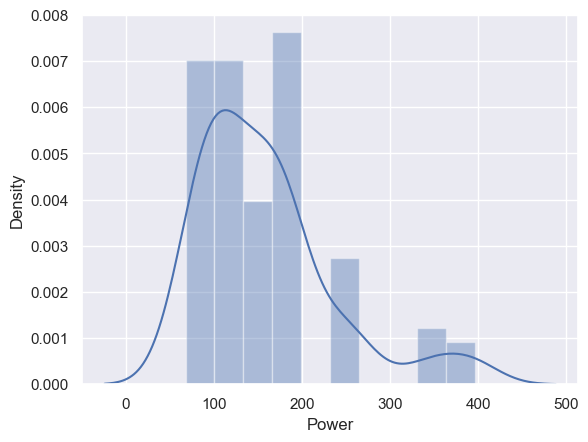

In [20]:
sns.distplot(data_with_sklearn['Power'])

C:\Users\hp\AppData\Local\Temp\ipykernel_15888\1446653992.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_sklearn['Seats'])


<Axes: xlabel='Seats', ylabel='Density'>

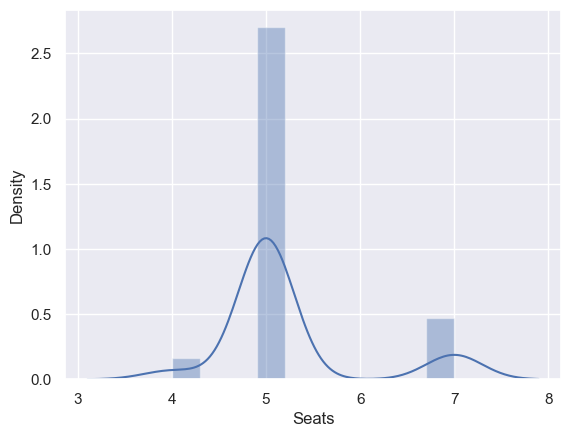

In [21]:
sns.distplot(data_with_sklearn['Seats'])

In [22]:
data_cleaned = data_with_sklearn.reset_index(drop=True)
data_with_sklearn.head(3)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,1,Corolla,2018,50000,0,0,1,15,1498,108,5,800000
1,2,2,Civic,2019,40000,0,1,2,17,1597,140,5,1000000
2,3,3,Mustang,2017,20000,0,1,1,10,4951,395,4,2500000


In [23]:
data_cleaned.describe(include='all')

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,100.000000,100.000000,100,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
unique,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Mustang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,50.500000,6.150000,NaN,2018.39000,28150.000000,0.480000,0.57000,1.690000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,3.214157,NaN,1.17116,9121.375716,0.502117,0.49757,0.691872,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,1.000000,NaN,2016.00000,10000.000000,0.000000,0.00000,1.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,3.000000,NaN,2017.75000,22000.000000,0.000000,0.00000,1.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,6.000000,NaN,2018.00000,27000.000000,0.000000,1.00000,2.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,9.000000,NaN,2019.00000,32000.000000,1.000000,1.00000,2.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06


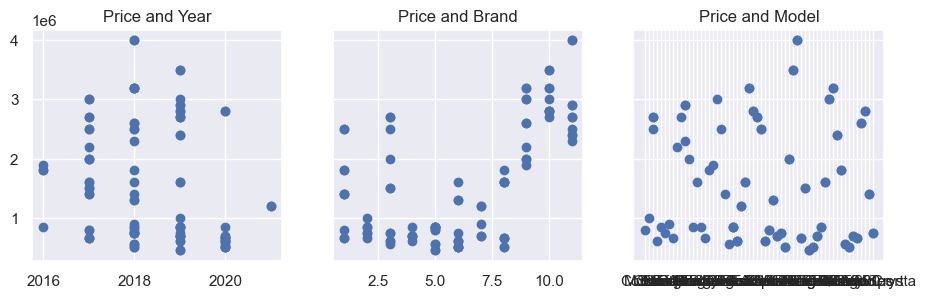

In [24]:
import matplotlib.pyplot as plt
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(11,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['Brand'],data_cleaned['Price'])
ax2.set_title('Price and Brand')
ax3.scatter(data_cleaned['Model'], data_cleaned['Price'])
ax3.set_title('Price and Model')
plt.show()

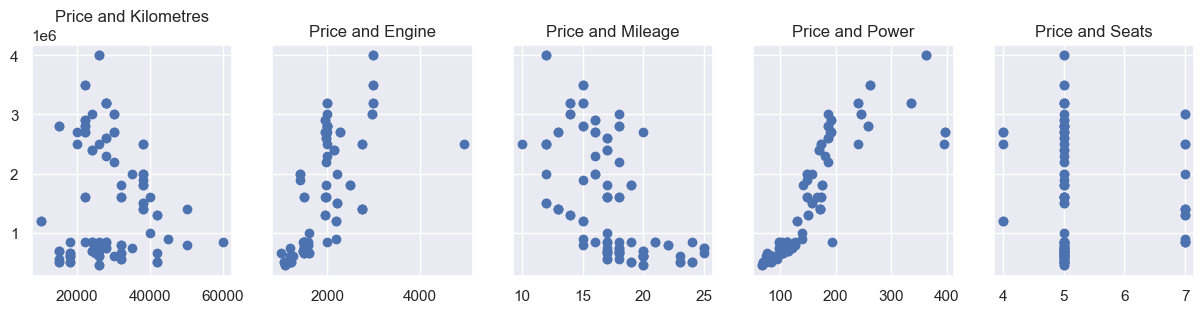

In [25]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize=(15,3))

ax1.scatter(data_cleaned['Kilometers_Driven'], data_cleaned['Price'])
ax1.set_title('Price and Kilometres')
ax2.scatter(data_cleaned['Engine'], data_cleaned['Price'])
ax2.set_title('Price and Engine')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')
ax4.scatter(data_cleaned['Power'], data_cleaned['Price'])
ax4.set_title('Price and Power')
ax5.scatter(data_cleaned['Seats'], data_cleaned['Price'])
ax5.set_title('Price and Seats')
plt.show()

In [26]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price ## this line adds a new column at the end
data_cleaned.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,log_price
0,1,1,Corolla,2018,50000,0,0,1,15,1498,108,5,800000,13.592367
1,2,2,Civic,2019,40000,0,1,2,17,1597,140,5,1000000,13.815511
2,3,3,Mustang,2017,20000,0,1,1,10,4951,395,4,2500000,14.731801
3,4,4,Swift,2020,30000,1,0,3,23,1248,74,5,600000,13.304685
4,5,5,Sonata,2016,60000,1,1,2,18,1999,194,5,850000,13.652992


In [27]:
data_cleaned = data_cleaned.drop(['Price', 'Car_ID'], axis=1)

In [28]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              100 non-null    int64  
 1   Model              100 non-null    object 
 2   Year               100 non-null    int64  
 3   Kilometers_Driven  100 non-null    int64  
 4   Fuel_Type          100 non-null    int64  
 5   Transmission       100 non-null    int64  
 6   Owner_Type         100 non-null    int64  
 7   Mileage            100 non-null    int64  
 8   Engine             100 non-null    int64  
 9   Power              100 non-null    int64  
 10  Seats              100 non-null    int64  
 11  log_price          100 non-null    float64
dtypes: float64(1), int64(10), object(1)
memory usage: 9.5+ KB


In [29]:
data_cleaned.tail()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,log_price
95,11,C-Class,2019,22000,1,1,1,16,1950,191,5,14.880221
96,1,Innova Crysta,2017,38000,1,0,2,13,2755,171,7,14.151983
97,3,EcoSport,2018,26000,0,0,3,18,1497,121,5,13.527828
98,5,Verna,2019,24000,0,1,2,17,1497,113,5,13.652992
99,6,Altroz,2020,18000,0,0,1,20,1199,85,5,13.304685


In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the independent variables
variables = data_cleaned[['Brand','Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'log_price']]  # Note the double square brackets

# Create a DataFrame to store the VIF values and feature names
vif = pd.DataFrame()

# Calculate the VIF for each variable
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

# Assign feature names to the DataFrame
vif["features"] = variables.columns

# Display the VIF values and feature names
print(vif)


            VIF           features
0      9.690271              Brand
1   3524.029063               Year
2     14.576051  Kilometers_Driven
3      4.018174          Fuel_Type
4      5.365208       Transmission
5      9.031144         Owner_Type
6     78.756344            Mileage
7     48.696749             Engine
8     36.232911              Power
9     81.017163              Seats
10  3562.439710          log_price


In [31]:
data_cleaned.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,log_price
0,1,Corolla,2018,50000,0,0,1,15,1498,108,5,13.592367
1,2,Civic,2019,40000,0,1,2,17,1597,140,5,13.815511
2,3,Mustang,2017,20000,0,1,1,10,4951,395,4,14.731801
3,4,Swift,2020,30000,1,0,3,23,1248,74,5,13.304685
4,5,Sonata,2016,60000,1,1,2,18,1999,194,5,13.652992


In [32]:
data_cleaned = data_cleaned.drop(['Model'], axis=1)

In [33]:
data_cleaned.corr()

,Brand,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,log_price
Brand,1.000000,0.043337,-0.256078,0.080113,0.520756,-0.183280,-0.155856,0.126469,0.350248,-0.244869,0.526249
Year,0.043337,1.000000,-0.741176,-0.252843,-0.211993,-0.036276,0.213177,-0.355122,-0.249446,-0.252598,-0.307106
Kilometers_Driven,-0.256078,-0.741176,1.000000,0.323762,-0.030157,-0.000560,-0.104437,0.112340,-0.026732,0.396443,0.027309
Fuel_Type,0.080113,-0.252843,0.323762,1.000000,0.066306,-0.323325,0.060292,0.258043,0.008562,0.347549,0.249695
Transmission,0.520756,-0.211993,-0.030157,0.066306,1.000000,-0.097708,-0.331015,0.421374,0.574349,-0.111225,0.693121
Owner_Type,-0.183280,-0.036276,-0.000560,-0.323325,-0.097708,1.000000,0.072823,-0.248205,-0.237857,-0.075318,-0.331157
Mileage,-0.155856,0.213177,-0.104437,0.060292,-0.331015,0.072823,1.000000,-0.680949,-0.648894,-0.194581,-0.639202
Engine,0.126469,-0.355122,0.112340,0.258043,0.421374,-0.248205,-0.680949,1.000000,0.805709,0.179179,0.735843
Power,0.350248,-0.249446,-0.026732,0.008562,0.574349,-0.237857,-0.648894,0.805709,1.000000,-0.102867,0.834785
Seats,-0.244869,-0.252598,0.396443,0.347549,-0.111225,-0.075318,-0.194581,0.179179,-0.102867,1.000000,0.050936


In [34]:
data_cleaned.corr()['log_price'].sort_values()

Mileage             -0.639202
Owner_Type          -0.331157
Year                -0.307106
Kilometers_Driven    0.027309
Seats                0.050936
Fuel_Type            0.249695
Brand                0.526249
Transmission         0.693121
Engine               0.735843
Power                0.834785
log_price            1.000000
Name: log_price, dtype: float64

In [35]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              100 non-null    int64  
 1   Year               100 non-null    int64  
 2   Kilometers_Driven  100 non-null    int64  
 3   Fuel_Type          100 non-null    int64  
 4   Transmission       100 non-null    int64  
 5   Owner_Type         100 non-null    int64  
 6   Mileage            100 non-null    int64  
 7   Engine             100 non-null    int64  
 8   Power              100 non-null    int64  
 9   Seats              100 non-null    int64  
 10  log_price          100 non-null    float64
dtypes: float64(1), int64(10)
memory usage: 8.7 KB


In [36]:
inputs = data_cleaned.drop(['log_price'], axis=1)
target = data_cleaned['log_price']


In [37]:
target=pd.DataFrame(target)

In [38]:
from sklearn.preprocessing import StandardScaler
#----------------------------------------------------

#Standard Scaler for Data
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(inputs)

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
y = scaler.fit_transform(target)

In [39]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=365)

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

# Assuming you have already split your data into X_train, X_test, y_train, y_test

regB_model = GradientBoostingRegressor()
regB_model.fit(x_train, y_train)

# Calculating Details
print('Gradient Boosting Regressor Train Score is:', regB_model.score(x_train, y_train))
print('Gradient Boosting Regressor Test Score is:', regB_model.score(x_test, y_test))


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Regressor Train Score is: 0.9996677314418922
Gradient Boosting Regressor Test Score is: 0.9003985127550277


In [41]:
from sklearn.ensemble import RandomForestRegressor

# Assuming you have already defined and split your data into X_train, X_test, y_train, y_test

# Create a Random Forest Regressor object
reg_rf = RandomForestRegressor()

# Fit the model to the training data
reg_rf.fit(x_train, y_train)

# Print the R-squared scores
print('Random Forest Regressor Train Score is:', reg_rf.score(x_train, y_train))
print('Random Forest Regressor Test Score is:', reg_rf.score(x_test, y_test))


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor Train Score is: 0.9947702765886626
Random Forest Regressor Test Score is: 0.8635794285604175
